###Imports & Read Data

In [ ]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyt
import scipy.stats as st
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load & read data
building_data_to_load = "/content/drive/MyDrive/IJ Data Analysis/Biz Permits/Building_Permits.csv"
pd.set_option('display.max_rows', None)

# biz_license = pd.read_csv(biz_license_data_to_load, low_memory=False)
building_permit = pd.read_csv(building_data_to_load, low_memory=False)

### Buildings Data Overview

In [ ]:
#Columns
building_permit.columns.tolist()

In [ ]:
raw_build_df = building_permit
pd.set_option('display.max_columns', None)
raw_build_df.head()

,ID,PERMIT#,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,STREET_NUMBER,STREET DIRECTION,STREET_NAME,SUFFIX,WORK_DESCRIPTION,BUILDING_FEE_PAID,ZONING_FEE_PAID,OTHER_FEE_PAID,SUBTOTAL_PAID,BUILDING_FEE_UNPAID,ZONING_FEE_UNPAID,OTHER_FEE_UNPAID,SUBTOTAL_UNPAID,BUILDING_FEE_WAIVED,ZONING_FEE_WAIVED,OTHER_FEE_WAIVED,SUBTOTAL_WAIVED,TOTAL_FEE,CONTACT_1_TYPE,CONTACT_1_NAME,CONTACT_1_CITY,CONTACT_1_STATE,CONTACT_1_ZIPCODE,CONTACT_2_TYPE,CONTACT_2_NAME,CONTACT_2_CITY,CONTACT_2_STATE,CONTACT_2_ZIPCODE,CONTACT_3_TYPE,CONTACT_3_NAME,CONTACT_3_CITY,CONTACT_3_STATE,CONTACT_3_ZIPCODE,CONTACT_4_TYPE,CONTACT_4_NAME,CONTACT_4_CITY,CONTACT_4_STATE,CONTACT_4_ZIPCODE,CONTACT_5_TYPE,CONTACT_5_NAME,CONTACT_5_CITY,CONTACT_5_STATE,CONTACT_5_ZIPCODE,CONTACT_6_TYPE,CONTACT_6_NAME,CONTACT_6_CITY,CONTACT_6_STATE,CONTACT_6_ZIPCODE,CONTACT_7_TYPE,CONTACT_7_NAME,CONTACT_7_CITY,CONTACT_7_STATE,CONTACT_7_ZIPCODE,CONTACT_8_TYPE,CONTACT_8_NAME,CONTACT_8_CITY,CONTACT_8_STATE,CONTACT_8_ZIPCODE,CONTACT_9_TYPE,CONTACT_9_NAME,CONTACT_9_CITY,CONTACT_9_STATE,CONTACT_9_ZIPCODE,CONTACT_10_TYPE,CONTACT_10_NAME,CONTACT_10_CITY,CONTACT_10_STATE,CONTACT_10_ZIPCODE,CONTACT_11_TYPE,CONTACT_11_NAME,CONTACT_11_CITY,CONTACT_11_STATE,CONTACT_11_ZIPCODE,CONTACT_12_TYPE,CONTACT_12_NAME,CONTACT_12_CITY,CONTACT_12_STATE,CONTACT_12_ZIPCODE,CONTACT_13_TYPE,CONTACT_13_NAME,CONTACT_13_CITY,CONTACT_13_STATE,CONTACT_13_ZIPCODE,CONTACT_14_TYPE,CONTACT_14_NAME,CONTACT_14_CITY,CONTACT_14_STATE,CONTACT_14_ZIPCODE,CONTACT_15_TYPE,CONTACT_15_NAME,CONTACT_15_CITY,CONTACT_15_STATE,CONTACT_15_ZIPCODE,REPORTED_COST,PIN1,PIN2,PIN3,PIN4,PIN5,PIN6,PIN7,PIN8,PIN9,PIN10,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION
0,1830273,100190752,PERMIT - SIGNS,SIGN PERMIT,10/16/2007,03/05/2008,141.0,6349,S,COTTAGE GROVE,AVE,INSTALL BUILDING SIGN,70.0,75.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145.0,SIGN CONTRACTOR,JAS. D. AHERN CO.,CHICAGO,IL,60623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,20-23-100-005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2060019,100296510,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,06/15/2009,06/15/2009,0.0,10000,N,BESSIE COLEMAN,DR,LOW VOLTAGE,50.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,CONTRACTOR-ELECTRICAL,ELITE ELECTRIC CO. INC.,MELROSE PARK,IL,60160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN,41.0,NaN,NaN,NaN,NaN,NaN
2,1671981,100108067,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,04/17/2006,04/17/2006,0.0,7535,N,HERMITAGE,AVE,ADD CIRCUITS FOR COMPUTERS.,40.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,CONTRACTOR-ELECTRICAL,"PACE SYSTEMS, INC.",NAPERVILLE,IL,60563-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2832499,100696131,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,03/20/2017,03/20/2017,0.0,150,N,RIVERSIDE,PLZ,LOW VOLTAGE CABLING FOR 18TH & 25TH FLOOR BUIL...,150.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,CONTRACTOR-ELECTRICAL,PAUL M CARUSO,LOMBARD,IL,60148-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

###Concatenate Addresses

In [ ]:
# Assuming you have a DataFrame named raw_build_df with the mentioned columns
raw_build_df['FULL_ADDRESS'] = raw_build_df['STREET_NUMBER'].astype(str) + ' ' + \
                               raw_build_df['STREET DIRECTION'].astype(str) + ' ' + \
                               raw_build_df['STREET_NAME'].astype(str) + ' ' + \
                               raw_build_df['SUFFIX'].astype(str)
pd.set_option('display.max_columns', None)
raw_build_df.sample(10)

,ID,PERMIT#,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,STREET_NUMBER,STREET DIRECTION,STREET_NAME,SUFFIX,WORK_DESCRIPTION,BUILDING_FEE_PAID,ZONING_FEE_PAID,OTHER_FEE_PAID,SUBTOTAL_PAID,BUILDING_FEE_UNPAID,ZONING_FEE_UNPAID,OTHER_FEE_UNPAID,SUBTOTAL_UNPAID,BUILDING_FEE_WAIVED,ZONING_FEE_WAIVED,OTHER_FEE_WAIVED,SUBTOTAL_WAIVED,TOTAL_FEE,CONTACT_1_TYPE,CONTACT_1_NAME,CONTACT_1_CITY,CONTACT_1_STATE,CONTACT_1_ZIPCODE,CONTACT_2_TYPE,CONTACT_2_NAME,CONTACT_2_CITY,CONTACT_2_STATE,CONTACT_2_ZIPCODE,CONTACT_3_TYPE,CONTACT_3_NAME,CONTACT_3_CITY,CONTACT_3_STATE,CONTACT_3_ZIPCODE,CONTACT_4_TYPE,CONTACT_4_NAME,CONTACT_4_CITY,CONTACT_4_STATE,CONTACT_4_ZIPCODE,CONTACT_5_TYPE,CONTACT_5_NAME,CONTACT_5_CITY,CONTACT_5_STATE,CONTACT_5_ZIPCODE,CONTACT_6_TYPE,CONTACT_6_NAME,CONTACT_6_CITY,CONTACT_6_STATE,CONTACT_6_ZIPCODE,CONTACT_7_TYPE,CONTACT_7_NAME,CONTACT_7_CITY,CONTACT_7_STATE,CONTACT_7_ZIPCODE,CONTACT_8_TYPE,CONTACT_8_NAME,CONTACT_8_CITY,CONTACT_8_STATE,CONTACT_8_ZIPCODE,CONTACT_9_TYPE,CONTACT_9_NAME,CONTACT_9_CITY,CONTACT_9_STATE,CONTACT_9_ZIPCODE,CONTACT_10_TYPE,CONTACT_10_NAME,CONTACT_10_CITY,CONTACT_10_STATE,CONTACT_10_ZIPCODE,CONTACT_11_TYPE,CONTACT_11_NAME,CONTACT_11_CITY,CONTACT_11_STATE,CONTACT_11_ZIPCODE,CONTACT_12_TYPE,CONTACT_12_NAME,CONTACT_12_CITY,CONTACT_12_STATE,CONTACT_12_ZIPCODE,CONTACT_13_TYPE,CONTACT_13_NAME,CONTACT_13_CITY,CONTACT_13_STATE,CONTACT_13_ZIPCODE,CONTACT_14_TYPE,CONTACT_14_NAME,CONTACT_14_CITY,CONTACT_14_STATE,CONTACT_14_ZIPCODE,CONTACT_15_TYPE,CONTACT_15_NAME,CONTACT_15_CITY,CONTACT_15_STATE,CONTACT_15_ZIPCODE,REPORTED_COST,PIN1,PIN2,PIN3,PIN4,PIN5,PIN6,PIN7,PIN8,PIN9,PIN10,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION,FULL_ADDRESS
154862,1854969,100204737,PERMIT - SIGNS,SIGN PERMIT,10/29/2007,11/07/2007,9.0,2300,N,WESTERN,AVE,NORTH ELEVATION FACING WESTERN AVENUE,67.0,75.0,0.0,142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142.0,CONTRACTOR-ELECTRICAL,ICON IDENTITY SOLUTIONS,ROLLING MEADOWS,IL,60008,SIGN CONTRACTOR,ICON IDENTITY SOLUTIONS,ROLLING MEADOWS,IL,60008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,13-36-209-026,14-30-116-085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.159941e+06,1.915314e+06,41.923335,-87.687743,POINT (-87.687742798645 41.923335003624),2300 N WESTERN AVE
282328,2253358,100384011,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,03/07/2011,03/07/2011,0.0,5411,W,MELROSE,ST,PROVIDE DEDICATED CIRCUIT FOR VERTICAL PLATFOR...,100.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,CONTRACTOR-ELECTRICAL,KASPER ELECTRIC COMPANY INC,DES PLAINES,IL,60018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,13-21-328-015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,1511.0,38.0,1.139659e+06,1.921038e+06,41.939435,-87.762127,POINT (-87.762127222148 41.939434605507),5411 W MELROSE ST
298078,2297178,100405368,PERMIT - RENOVATION/ALTERATION,STANDARD PLAN REVIEW,08/22/2011,08/29/2011,7.0,454,E,40TH,ST,EXTERIOR WORK TO BUILDING AS REQUIRED DUE TO P...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,75.0,0.0,375.0,375.0,ARCHITECT,LISEC WARREN M,CHICAGO,IL,60607,CONTRACTOR-ELECTRICAL,TAYLOR ELECTRIC COMPANY,CHICAGO,IL,60649,EXPEDITOR,PHASE 1 CONSULTING INC.,CHICAGO,IL,60606-,CONTRACTOR-GENERAL CONTRACTOR,LINN-MATHES INC,CHICAGO,IL,60607-,CONTRACTOR-PLUMBER/PLUMBING,"EWING-DOHERTY MECHANICAL, INC",BENSENVILLE,IL,60106,OWNER,BRONZEVILLE ASSOCIATES LIMITED PARTNERSHIP,CHICAGO,IL,60653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

###Remove Extraneous Columns

In [ ]:
columns_to_drop = [
    'STREET_NUMBER', 'STREET DIRECTION', 'STREET_NAME', 'SUFFIX',
    'CONTACT_2_TYPE', 'CONTACT_2_NAME', 'CONTACT_2_CITY', 'CONTACT_2_STATE', 'CONTACT_2_ZIPCODE',
    'CONTACT_3_TYPE', 'CONTACT_3_NAME', 'CONTACT_3_CITY', 'CONTACT_3_STATE', 'CONTACT_3_ZIPCODE',
    'CONTACT_4_TYPE', 'CONTACT_4_NAME', 'CONTACT_4_CITY', 'CONTACT_4_STATE', 'CONTACT_4_ZIPCODE',
    'CONTACT_5_TYPE', 'CONTACT_5_NAME', 'CONTACT_5_CITY', 'CONTACT_5_STATE', 'CONTACT_5_ZIPCODE',
    'CONTACT_6_TYPE', 'CONTACT_6_NAME', 'CONTACT_6_CITY', 'CONTACT_6_STATE', 'CONTACT_6_ZIPCODE',
    'CONTACT_7_TYPE', 'CONTACT_7_NAME', 'CONTACT_7_CITY', 'CONTACT_7_STATE', 'CONTACT_7_ZIPCODE',
    'CONTACT_8_TYPE', 'CONTACT_8_NAME', 'CONTACT_8_CITY', 'CONTACT_8_STATE', 'CONTACT_8_ZIPCODE',
    'CONTACT_9_TYPE', 'CONTACT_9_NAME', 'CONTACT_9_CITY', 'CONTACT_9_STATE', 'CONTACT_9_ZIPCODE',
    'CONTACT_10_TYPE', 'CONTACT_10_NAME', 'CONTACT_10_CITY', 'CONTACT_10_STATE', 'CONTACT_10_ZIPCODE',
    'CONTACT_11_TYPE', 'CONTACT_11_NAME', 'CONTACT_11_CITY', 'CONTACT_11_STATE', 'CONTACT_11_ZIPCODE',
    'CONTACT_12_TYPE', 'CONTACT_12_NAME', 'CONTACT_12_CITY', 'CONTACT_12_STATE', 'CONTACT_12_ZIPCODE',
    'CONTACT_13_TYPE', 'CONTACT_13_NAME', 'CONTACT_13_CITY', 'CONTACT_13_STATE', 'CONTACT_13_ZIPCODE',
    'CONTACT_14_TYPE', 'CONTACT_14_NAME', 'CONTACT_14_CITY', 'CONTACT_14_STATE', 'CONTACT_14_ZIPCODE',
    'CONTACT_15_TYPE', 'CONTACT_15_NAME', 'CONTACT_15_CITY', 'CONTACT_15_STATE', 'CONTACT_15_ZIPCODE',
]

build_col_drop = raw_build_df.drop(columns=columns_to_drop, errors='ignore')

build_col_drop.sample(5)

,ID,PERMIT#,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,WORK_DESCRIPTION,BUILDING_FEE_PAID,ZONING_FEE_PAID,OTHER_FEE_PAID,SUBTOTAL_PAID,BUILDING_FEE_UNPAID,ZONING_FEE_UNPAID,OTHER_FEE_UNPAID,SUBTOTAL_UNPAID,BUILDING_FEE_WAIVED,ZONING_FEE_WAIVED,OTHER_FEE_WAIVED,SUBTOTAL_WAIVED,TOTAL_FEE,CONTACT_1_TYPE,CONTACT_1_NAME,CONTACT_1_CITY,CONTACT_1_STATE,CONTACT_1_ZIPCODE,REPORTED_COST,PIN1,PIN2,PIN3,PIN4,PIN5,PIN6,PIN7,PIN8,PIN9,PIN10,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION,FULL_ADDRESS
737121,3315185,101011014,PERMIT - EASY PERMIT PROCESS,EASY PERMIT WEB,03/30/2023,03/30/2023,0.0,"FENCES: 32FT IN X 6FT IN: QTY 1, ROOF RECOVER ...",325.0,75.0,0.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0,CONTRACTOR-GENERAL CONTRACTOR,PRO RENOVATION CONCEPTS INC,CHICAGO,IL,60608-,1500.0,20-17-124-024-0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,670200.0,16.0,1.166966e+06,1.866042e+06,41.787979,-87.663344,POINT (-87.663343521385 41.787979418993),5818 S JUSTINE ST
552945,2921764,100749822,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,03/02/2018,03/02/2018,0.0,MONTHLY MAINTENANCE PERMIT - MARCH 2018,150.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,CONTRACTOR-ELECTRICAL,"SHAMROCK ELECTRIC CO., INC.",ELK GROVE VILLAGE,IL,60007-,100.0,17-16-226-005,17-16-226-012,17-16-226-013,17-16-500-022,NaN,NaN,NaN,NaN,NaN,NaN,32.0,839100.0,42.0,1.173868e+06,1.898906e+06,41.878011,-87.637059,POINT (-87.637058522337 41.878010923718),300 S WACKER DR
533492,2877151,100723577,PERMIT - ELEVATOR EQUIPMENT,CONVEYANCE DEVICE PERMIT,08/30/2017,09/06/2017,7.0,"Replace Hoist Ropes On One (1) 3500lb.cap, 12-...",275.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,CONTRACTOR-ELEVATOR,ANDERSON ELEVATOR,BROADVIEW,IL,60155-,5000.0,17-09-447-004-0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,839100.0,42.0,1.175153e+06,1.901014e+06,41.883765,-87.632275,POINT (-87.632275353537 41.883764598103),121 N LA SALLE ST
27332,2675267,100605177,PERMIT - RENOVATION/ALTERATION,STANDARD PLAN REVIEW,08/04/2015,08/05/2015,1.0,INTERIOR ALTERATION FOR DINING ROOM REMODELING...,1150.0,75.0,0.0,1225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1225.0,OWNER,MICHAEL LUK,CHICAGO,IL,60616,150000.0,17-28-220-009-0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,841100.0,25.0,1.175305e+06,1.888603e+06,41.849706,-87.632090,POINT (-87.632089559207 41.849706090496),2342 S WENTWORTH AVE
377473,2512138,100513663,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,10/17/2013,10/17/2013,0.0,NWE CAR GARAGE WITH LAP POOL ON DECK,100.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,CONTRACTOR-ELECTRICAL,"JRO ELECTRIC, INC",ARLINGTON HEIGHTS,IL,60004,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,70600.0,32.0,1.165949e+06,1.916467e+06,41.926372,-87.665633,POINT (-87.665633195273 41.926372485313),2439 N GREENVIEW AVE


###Create Mask to Filter Dates: 1/1/18 - 7/26/23

In [ ]:
#Create new dataframe
build_filtered = build_col_drop.copy()

#Drop NA's from APPLICATION_START_DATE using na_drop_mask
cols_to_check = ['APPLICATION_START_DATE']
build_filtered[cols_to_check] = build_filtered[cols_to_check].replace(['None', 'NaN'], np.nan)
na_drop_mask = build_filtered[cols_to_check].isna().any(axis=1)

#Make date_mask to filter for target dates
date_mask = (pd.to_datetime(build_filtered["APPLICATION_START_DATE"], format="%m/%d/%Y", errors='coerce') >= "2018-01-01") & (pd.to_datetime(build_filtered["APPLICATION_START_DATE"], format="%m/%d/%Y", errors='coerce') <= "2023-07-26")
build_filtered = build_filtered[date_mask & ~na_drop_mask]

build_filtered.sample(5)

,ID,PERMIT#,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,WORK_DESCRIPTION,BUILDING_FEE_PAID,ZONING_FEE_PAID,OTHER_FEE_PAID,SUBTOTAL_PAID,BUILDING_FEE_UNPAID,ZONING_FEE_UNPAID,OTHER_FEE_UNPAID,SUBTOTAL_UNPAID,BUILDING_FEE_WAIVED,ZONING_FEE_WAIVED,OTHER_FEE_WAIVED,SUBTOTAL_WAIVED,TOTAL_FEE,CONTACT_1_TYPE,CONTACT_1_NAME,CONTACT_1_CITY,CONTACT_1_STATE,CONTACT_1_ZIPCODE,REPORTED_COST,PIN1,PIN2,PIN3,PIN4,PIN5,PIN6,PIN7,PIN8,PIN9,PIN10,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION,FULL_ADDRESS
446,3189772,100924823,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,06/01/2021,06/01/2021,0.0,Revision to permit #100838566 to ADD Ampere El...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,75.0,75.0,CONTRACTOR-ELECTRICAL,AMPERE ELECTRIC,PLAINFIELD,IL,60585,1.0,12-08-100-006-0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,980000.0,41.0,NaN,NaN,NaN,NaN,NaN,10000 W OHARE ST
44772,3003954,100800692,PERMIT - NEW CONSTRUCTION,DIRECT DEVELOPER SERVICES,01/25/2019,02/13/2019,19.0,DDS - PERMIT REVISIONS FOR 100769008 TO INCLUD...,3000.0,75.0,0.0,3075.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3075.0,OWNER OCCUPIED,ROBERT JUIDICI,CHICAGO,IL,60601,200000.0,13-03-405-002-0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,130200.0,39.0,1.148374e+06,1.939529e+06,41.990014,-87.729616,POINT (-87.72961619868 41.990013733891),4025 W PETERSON AVE
549069,2912307,100744534,PERMIT - RENOVATION/ALTERATION,STANDARD PLAN REVIEW,01/26/2018,01/26/2018,0.0,REMOVE AND REPLACE (2) EXISTING REAR OPEN WOOD...,200.0,75.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,OWNER,BOWGAN SQUARE LLC,CHICAGO,IL,60647,20511.0,13-35-120-023-0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,220901.0,35.0,1.151452e+06,1.914078e+06,41.920112,-87.718964,POINT (-87.718964420336 41.920111826492),3656 W SHAKESPEARE AVE
671196,3177986,100916071,PERMIT - REINSTATE REVOKED PMT,EASY PERMIT,04/05/2021,04/05/2021,0.0,REINSTATE PERMIT #100627129 no change to owner...,1125.0,0.0,0.0,1125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1125.0,NaN,NaN,NaN,NaN,NaN,1.0,16-23-327-009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,841400.0,24.0,1.152401e+06,1.889752e+06,41.853341,-87.716120,POINT (-87.716120019718 41.853340850004),2121 S MILLARD AVE
685993,3208291,100937695,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,08/30/2021,08/30/2021,0.0,INSTALL 200 AMP 1METER SERVICE WITH NEW GE PAN...,75.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,CONTRACTOR-ELECTRICAL,"WIZARD ELECTRIC, INC.",CHICAGO,IL,60618-5624,200.0,13-27-105-036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,200100.0,31.0,1.145793e+06,1.920386e+06,41.937532,-87.739596,POINT (-87.739596204958 41.937531708711),3112 N KILBOURN AVE


###Number of Unique Addresses: 95,609

In [ ]:
build_filtered["FULL_ADDRESS"].nunique()
# unique_addys = build_filtered["FULL_ADDRESS"].nunique()
# print(f'There are {unique_addys} unique addressed in the filtered dataset')

95609

###Find any duplicated rows across entire dataset: None Present

In [ ]:
# This will return True for all rows that are duplicates across all columns
duplicates = build_filtered.duplicated(keep=False)

# To see if there are any duplicates in the DataFrame
any_duplicates = duplicates.any()

# To see the number of duplicate rows
number_of_duplicates = duplicates.sum()

# To get a DataFrame containing only duplicates
duplicate_rows = build_filtered[duplicates]
pd.set_option('display.max_rows', None)

duplicate_rows

,ID,PERMIT#,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,WORK_DESCRIPTION,BUILDING_FEE_PAID,ZONING_FEE_PAID,OTHER_FEE_PAID,SUBTOTAL_PAID,BUILDING_FEE_UNPAID,ZONING_FEE_UNPAID,OTHER_FEE_UNPAID,SUBTOTAL_UNPAID,BUILDING_FEE_WAIVED,ZONING_FEE_WAIVED,OTHER_FEE_WAIVED,SUBTOTAL_WAIVED,TOTAL_FEE,CONTACT_1_TYPE,CONTACT_1_NAME,CONTACT_1_CITY,CONTACT_1_STATE,CONTACT_1_ZIPCODE,REPORTED_COST,PIN1,PIN2,PIN3,PIN4,PIN5,PIN6,PIN7,PIN8,PIN9,PIN10,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION,FULL_ADDRESS


###Check for Duplicates in FULL_ADDRESS Column: 173,657 Address Dupes Found

In [ ]:
# Check for duplicate 'FULL_ADDRESS'
address_dupes = build_filtered.duplicated(subset=['FULL_ADDRESS'], keep=False)
address_dupes_count = address_dupes.sum()
print(f'There are {address_dupes_count} duplicate addresses in the data')

There are 173657 duplicate addresses in the data


###Sample of Address Dupes, Sorted

In [ ]:
#Find Dupes
dupes = build_filtered.duplicated(subset=['FULL_ADDRESS'], keep=False)
addy_dupes = build_filtered[dupes]

#Sort by address for easier reading
addy_dupes_sorted = addy_dupes.sort_values('FULL_ADDRESS')

addy_dupes_sorted.head(5)

,ID,PERMIT#,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,WORK_DESCRIPTION,BUILDING_FEE_PAID,ZONING_FEE_PAID,OTHER_FEE_PAID,SUBTOTAL_PAID,BUILDING_FEE_UNPAID,ZONING_FEE_UNPAID,OTHER_FEE_UNPAID,SUBTOTAL_UNPAID,BUILDING_FEE_WAIVED,ZONING_FEE_WAIVED,OTHER_FEE_WAIVED,SUBTOTAL_WAIVED,TOTAL_FEE,CONTACT_1_TYPE,CONTACT_1_NAME,CONTACT_1_CITY,CONTACT_1_STATE,CONTACT_1_ZIPCODE,REPORTED_COST,PIN1,PIN2,PIN3,PIN4,PIN5,PIN6,PIN7,PIN8,PIN9,PIN10,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION,FULL_ADDRESS
570338,2961443,100774311,PERMIT - ELECTRIC WIRING,FIRE PROTECTION SYSTEM,10/04/2018,10/04/2018,0.0,"INSTALLATION OF D/C FA SYSTEM AS C3,TYPE-III O...",75.00,0.0,0.0,75.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.00,CONTRACTOR-ELECTRICAL,"BME ELECTRIC, INC.",BRIDGEVIEW,IL,60455-,0.0,25-22-109-034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,491400.0,9.0,1.178295e+06,1.830008e+06,41.688848,-87.622894,POINT (-87.622893689491 41.6888481194),1 E 113TH ST
548628,2911042,100743918,PERMIT - RENOVATION/ALTERATION,STANDARD PLAN REVIEW,02/09/2018,07/10/2018,151.0,INTERIOR ALTERATION FROM DAY CARE TO NEW DAY ...,2408.25,75.0,0.0,2483.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2483.25,OWNER OCCUPIED,TIFFINEY GRAHAM,CHICAGO,IL,60628,45000.0,25-22-109-034-0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,491400.0,9.0,1.178295e+06,1.830008e+06,41.688848,-87.622894,POINT (-87.622893689491 41.6888481194),1 E 113TH ST
608075,3045601,100825922,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,06/18/2019,06/18/2019,0.0,INSTALL EV CHARGER,150.00,0.0,0.0,150.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.00,CONTRACTOR-ELECTRICAL,KAPITAL ELECTRIC COMPANY,BENSENVILLE,IL,60106,2900.0,17-15-304-060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,320600.0,4.0,1.176494e+06,1.896627e+06,41.871698,-87.627484,POINT (-87.627484472649 41.871697769698),1 E 8TH ST
589094,3002438,100799844,PERMIT - ELEVATOR EQUIPMENT,CONVEYANCE DEVICE PERMIT,01/07/2019,01/07/2019,0.0,"Furnish and Install New Hoist Machines, Hoist ...",1230.00,0.0,0.0,1230.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1230.00,CONTRACTOR-ELEVATOR,SUBURBAN ELEVATOR CO,EAST DUNDEE,IL,60118-,192000.0,17-15-304-060-0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,320600.0,4.0,1.176494e+06,1.896627e+06,41.871698,-87.627484,POINT (-87.627484472649 41.871697769698),1 E 8TH ST
64727,3285182,100991223,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,10/13/2022,10/20/2022,7.0,"20 sq ft of concrete repair, 20 l ft of repair...",500.00,50.0,0.0,550.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.00,OWNER OCCUPIED,JOLITA ORTZ,CHICAGO,IL,60605,61340.0,17-15-304-060-0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,320600.0,4.0,1.176494e+06,1.896627e+06,41.871698,-87.627484,POINT (-87.627484472649 41.871697769698),1 E 8TH ST


In [ ]:
addy_dupes_sorted["FULL_ADDRESS"].value_counts()

###Check for Duplicates in PERMIT, ID Columns: None Found

In [ ]:
# Check for duplicate 'PERMIT#'
permit_dupes = build_filtered.duplicated(subset=['PERMIT#'], keep=False)
permit_dupes_count = permit_dupes.sum()


# Check for duplicate 'ID'
_id_dupes = build_filtered.duplicated(subset=['ID'], keep=False)
_id_dupes_count = _id_dupes.sum()

print(f'There are {permit_dupes_count} duplicate permit numbers in the data')
print(f'There are {_id_dupes_count} duplicate ID numbers in the data')

There are 0 duplicate permit numbers in the data
There are 0 duplicate ID numbers in the data


###View Dupes for Specific Addresses

In [ ]:
specific_addy_dupes = addy_dupes_sorted[addy_dupes_sorted["FULL_ADDRESS"] == '111 S WACKER DR']
specific_addy_dupes.head(10)

,ID,PERMIT#,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,WORK_DESCRIPTION,BUILDING_FEE_PAID,ZONING_FEE_PAID,OTHER_FEE_PAID,SUBTOTAL_PAID,BUILDING_FEE_UNPAID,ZONING_FEE_UNPAID,OTHER_FEE_UNPAID,SUBTOTAL_UNPAID,BUILDING_FEE_WAIVED,ZONING_FEE_WAIVED,OTHER_FEE_WAIVED,SUBTOTAL_WAIVED,TOTAL_FEE,CONTACT_1_TYPE,CONTACT_1_NAME,CONTACT_1_CITY,CONTACT_1_STATE,CONTACT_1_ZIPCODE,REPORTED_COST,PIN1,PIN2,PIN3,PIN4,PIN5,PIN6,PIN7,PIN8,PIN9,PIN10,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION,FULL_ADDRESS
696661,3230310,100952985,PERMIT - RENOVATION/ALTERATION,STANDARD PLAN REVIEW,01/12/2022,07/06/2022,175.0,EXTERIOR ALTERATIONS TO EXISTING 29TH FLOOR TO...,1500.00,75.0,0.0,1575.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1575.00,OWNER OCCUPIED,111 SOUTH WACKER LLC,CHICAGO,IL,60606,200000.0,17-16-208-002-0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,839100.0,42.0,1.173991e+06,1.899754e+06,41.880334,-87.63658,POINT (-87.63658023772 41.880334099207),111 S WACKER DR
670297,3176231,100914595,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,03/26/2021,03/31/2021,5.0,"GENERAL BUILDING MAINTENANCE MARCH, 2021",150.00,0.0,0.0,150.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.00,CONTRACTOR-ELECTRICAL,"PRIME ELECTRIC CO., INC.",CHICAGO,IL,60622,1000.0,17-16-208-002,17-16-208-003,17-16-208-018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,839100.0,42.0,1.173991e+06,1.899754e+06,41.880334,-87.63658,POINT (-87.63658023772 41.880334099207),111 S WACKER DR
590279,3005439,100801511,PERMIT - ELECTRIC WIRING,FIRE PROTECTION SYSTEM,02/07/2019,02/07/2019,0.0,INSTALLATION OF MAG.LOCKS PER SECT.#13-160-269...,75.00,0.0,0.0,75.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.00,CONTRACTOR-ELECTRICAL,KASTLE CHICAGO LIMITED PARTNER,CHICAGO,IL,60606-,0.0,17-16-208-002,17-16-208-003,17-16-208-018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,839100.0,42.0,1.173991e+06,1.899754e+06,41.880334,-87.63658,POINT (-87.63658023772 41.880334099207),111 S WACKER DR
625631,3084726,100849645,PERMIT - RENOVATION/ALTERATION,SELF CERT,12/03/2019,12/03/2019,0.0,SELF-CERT. PROJECT: MINOR INTERIOR GENERAL OFF...,750.00,75.0,0.0,825.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,825.00,SELF CERT ARCHITECT,MORDZINSKI ANDRZEJ,GLENVIEW,IL,60025,105000.0,17-16-208-002-0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,839100.0,42.0,1.173991e+06,1.899754e+06,41.880334,-87.63658,POINT (-87.63658023772 41.880334099207),111 S WACKER DR
735915,3312538,101009256,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,03/16/2023,05/04/2023,49.0,GENERAL MAINTENANCE APRIL 2023,150.00,0.0,0.0,150.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.00,CONTRACTOR-ELECTRICAL,"PRIME ELECTRIC CO., INC.",CHICAGO,IL,60622,1000.0,17-16-208-002,17-16-208-003,17-16-208-018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,839100.0,42.0,1.173991e+06,1.899754e+06,41.880334,-87.63658,POINT (-87.63658023772 41.880334099207),111 S WACKER DR
592904,3011974,100805144,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,02/18/2019,03/08/2019,18.0,MONTHLY MAINTENANCE PERMIT FOR THE PERIOD OF J...,225.00,0.0,0.0,225.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225.00,CONTRACTOR-ELECTRICAL,ILLINOIS BELL / AT&T,CHICAGO,IL,60606,250.0,17-16-208-002,17-16-208-003,17-16-208-018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,839100.0,42.0,1.173991e+06,1.899754e+06,41.880334,-87.63658,POINT (-87.63658023772 41.880334099207),111 S WACKER DR
549374,2912983,100744937,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,01/26/2018,01/26/2018,0.0,GENERAL BUILDING MAINTENANCE JAN 2018,150.00,0.0,0.0,150.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.00,CONTRACTOR-ELECTRICAL,"PRIME ELECTRIC CO., INC.",CHICAGO,IL,60622,1000.0,17-16-208-002,17-16-208-003,17-16-208-018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,839100.0,42.0,1.173991e+06,1.899754e+06,41.880334,-87.63658,POINT (-87.63658023772 41.880334099207),111 S WACKER DR
629950,3094781,100855709,PERMIT - RENOVATION/ALTERATION,STANDARD PLAN REVIEW,01/13/2020,02/18/2020,36.0,INTERIOR ALTERATION IN EXISTING OFFICE BUILDIN...,750.00,75.0,0.0,825.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,825.00,OWNER OCCUPIED,111 SOU

In [ ]:
# Assuming build_filtered is your DataFrame

# First, make sure to sort by address and application start date to see the sequence of permits
build_filtered.sort_values(by=['FULL_ADDRESS', 'APPLICATION_START_DATE'], inplace=True)

# If you decide to treat revisions as separate, ensure they're marked as such, potentially by a revision flag or date checks
# For simplicity, let's assume a revision is any additional row with the same address and a later application date

# To get an average processing time per address without considering revisions:
average_time_without_revisions = build_filtered.drop_duplicates(subset=['FULL_ADDRESS'], keep='first')['PROCESSING_TIME'].mean()

# To get an average processing time including revisions, simply use the mean of the processing time column
average_time_including_revisions = build_filtered['PROCESSING_TIME'].mean()

# To calculate averages by year, convert dates to datetime if not already done
build_filtered['APPLICATION_START_DATE'] = pd.to_datetime(build_filtered['APPLICATION_START_DATE'])
build_filtered['ISSUE_DATE'] = pd.to_datetime(build_filtered['ISSUE_DATE'])

# Then you can group by year as well as address
build_filtered['YEAR'] = build_filtered['APPLICATION_START_DATE'].dt.year
average_time_by_year = build_filtered.groupby('YEAR')['PROCESSING_TIME'].mean()

# Now print the results
print(f'Average processing time without considering revisions: {average_time_without_revisions}')
print(f'Average processing time including revisions: {average_time_including_revisions}')
print(average_time_by_year)


Average processing time without considering revisions: 18.043249066510477
Average processing time including revisions: 17.022845746866874
YEAR
2018    17.075509
2019    17.211518
2020    18.752010
2021    19.936910
2022    16.835148
2023     7.531574
Name: PROCESSING_TIME, dtype: float64


###Permit/Owner Types & Counts(to best aggregate data)

In [ ]:
#Permit Types
permit_types = build_filtered["PERMIT_TYPE"].value_counts()
permit_types

#--------------------------------------

# #Avg Grouped by Permit Types
# #AVG COMPLETION TIME BY PERMIT TYPE

# # Convert PROCESSING_TIME to numeric values (if it's not already)
# build_filtered['PROCESSING_TIME'] = pd.to_numeric(build_filtered['PROCESSING_TIME'], errors='coerce')

# # Group by 'PERMIT_TYPE', calculate the mean of 'PROCESSING_TIME', round it, and reset the index
# avg_permit_processing_time = build_filtered.groupby('PERMIT_TYPE')['PROCESSING_TIME'].mean().apply(np.ceil).reset_index()

# # Rename the columns and set 'PERMIT_TYPE' as index
# avg_permit_processing_time.columns = ['PERMIT_TYPE', 'Avg Processing Time (Days)']
# avg_permit_processing_time.set_index('PERMIT_TYPE', inplace=True)

# # Sort the DataFrame by 'Avg Processing Time (Days)' in descending order
# avg_permit_processing_time = avg_permit_processing_time.sort_values(by='Avg Processing Time (Days)', ascending=False)

# avg_permit_processing_time

#---------------------------------------
# #Owner Types
# contact1_types = build_filtered["CONTACT_1_TYPE"].unique()
# contact1_types


PERMIT - ELECTRIC WIRING          76214
PERMIT - EASY PERMIT PROCESS      70238
PERMIT - RENOVATION/ALTERATION    45153
PERMIT - SIGNS                    15326
PERMIT - NEW CONSTRUCTION          8177
PERMIT - ELEVATOR EQUIPMENT        7648
PERMIT - WRECKING/DEMOLITION       4827
PERMIT - SCAFFOLDING               2119
PERMIT - REINSTATE REVOKED PMT     1457
Name: PERMIT_TYPE, dtype: int64

###Permit Counts by Address

In [ ]:
#Permit Counts by Address
permit_count_per_address = build_filtered.groupby('FULL_ADDRESS').size().reset_index(name='Permit_Count')

# Sort the DataFrame in descending order of Permit_Count
permit_count_per_address = permit_count_per_address.sort_values(by='Permit_Count', ascending=False)

# Display the sorted DataFrame
permit_count_per_address

###Boxplot: Average Number of Permits per Address w/Outliers

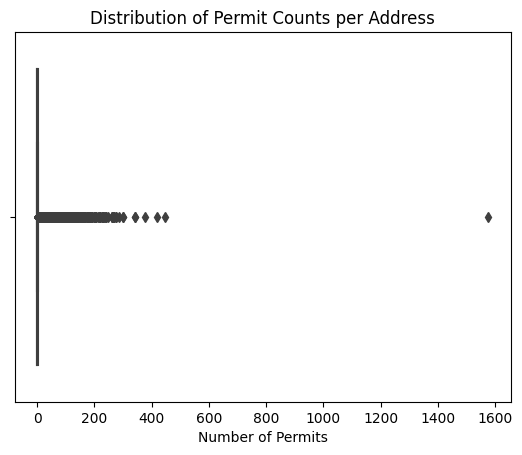

Median number of permits: 1.0
First quartile (25th percentile): 1.0
Third quartile (75th percentile): 2.0
Interquartile range (IQR): 1.0
Lower whisker: -0.5
Upper whisker: 3.5
Number of outliers: 10720
Outliers: [1576, 448, 418, 376, 342, 341, 301, 299, 286, 277, 277, 269, 269, 265, 263, 262, 261, 246, 240, 240, 238, 235, 230, 229, 228, 226, 221, 221, 219, 215, 214, 204, 204, 201, 201, 199, 197, 193, 193, 190, 187, 183, 183, 182, 179, 179, 177, 176, 175, 174, 170, 167, 165, 165, 164, 164, 163, 163, 162, 161, 161, 159, 158, 158, 157, 156, 155, 154, 154, 154, 153, 152, 152, 151, 149, 149, 148, 144, 143, 141, 137, 136, 135, 135, 135, 133, 133, 129, 129, 127, 126, 126, 124, 124, 121, 121, 120, 118, 118, 117, 116, 116, 114, 112, 111, 110, 110, 110, 110, 110, 110, 109, 108, 108, 107, 107, 107, 106, 106, 103, 102, 101, 101, 101, 101, 100, 100, 99, 99, 98, 97, 96, 96, 95, 93, 92, 92, 92, 91, 91, 90, 90, 90, 90, 89, 89, 89, 88, 88, 88, 88, 87, 87, 87, 86, 86, 85, 85, 84, 84, 84, 84, 84, 84, 84,

In [ ]:
# Assuming your DataFrame is named 'permit_count_per_address'
# and that it has a 'Permit_Count' column.

# Calculate quartiles
Q1 = permit_count_per_address['Permit_Count'].quantile(0.25)
Q3 = permit_count_per_address['Permit_Count'].quantile(0.75)
IQR = Q3 - Q1
median = permit_count_per_address['Permit_Count'].median()

# Define whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Identify outliers
outliers = permit_count_per_address[
    (permit_count_per_address['Permit_Count'] < lower_whisker) |
    (permit_count_per_address['Permit_Count'] > upper_whisker)
]['Permit_Count']

# Generate a boxplot
sns.boxplot(x=permit_count_per_address['Permit_Count'])

# Set titles and labels
pyt.title('Distribution of Permit Counts per Address')
pyt.xlabel('Number of Permits')

# Display the plot
pyt.show()

# Print out the interpretation
print(f"Median number of permits: {median}")
print(f"First quartile (25th percentile): {Q1}")
print(f"Third quartile (75th percentile): {Q3}")
print(f"Interquartile range (IQR): {IQR}")
print(f"Lower whisker: {lower_whisker}")
print(f"Upper whisker: {upper_whisker}")
print(f"Number of outliers: {len(outliers)}")
print(f"Outliers: {outliers.tolist()}")

###Barplot: Count, Number of Permits Per Unique Address (Percents Printed)

               Count  Percentage
1-2 permits    76919   80.451631
3-5 permits    13861   14.497589
6-10 permits    3051    3.191122
11-25 permits   1246    1.303225
26-50 permits    231    0.241609
50+ permits      301    0.314824


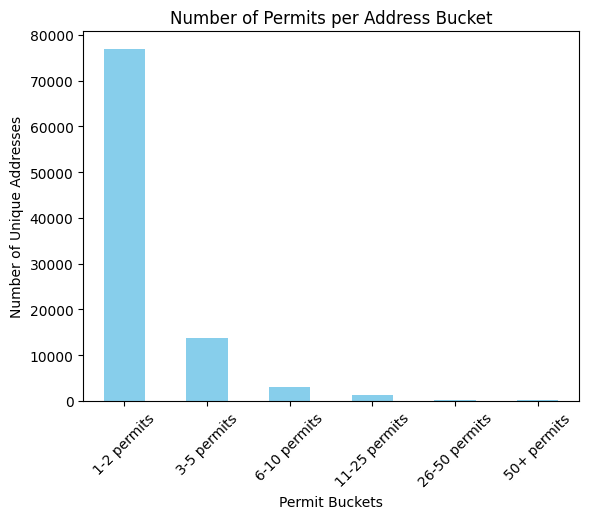

In [ ]:
# Assuming permit_count_per_address is a Series obtained from df.groupby('FULL_ADDRESS').size()

# Define the bins for the buckets
bins = [0, 2, 5, 10, 25, 50, float('inf')]
labels = ['1-2 permits', '3-5 permits', '6-10 permits', '11-25 permits', '26-50 permits', '50+ permits']

# Use pd.cut to create a 'Permit_Bucket' column which assigns each permit count to a bucket
permit_count_per_address['Permit_Bucket'] = pd.cut(permit_count_per_address['Permit_Count'], bins=bins, labels=labels, include_lowest=True)

# Group by 'Permit_Bucket' and count the number of addresses in each bucket
bucket_counts = permit_count_per_address['Permit_Bucket'].value_counts().reindex(labels)

# Calculate the percentage of the total unique addresses for each bucket
total_addresses = permit_count_per_address['FULL_ADDRESS'].nunique()
bucket_percentages = (bucket_counts / total_addresses) * 100

# Create a DataFrame to hold the count and percentage for each bucket
bucket_summary = pd.DataFrame({
    'Count': bucket_counts,
    'Percentage': bucket_percentages
}).fillna(0)  # Fill NaN values with 0

# Print the summary
print(bucket_summary)

# Plotting the bar graph
bucket_summary['Count'].plot(kind='bar', color='skyblue')
pyt.title('Number of Permits per Address Bucket')
pyt.xlabel('Permit Buckets')
pyt.ylabel('Number of Unique Addresses')
pyt.xticks(rotation=45)
pyt.show()


###Export CSV

In [ ]:
# from google.colab import files

# # Save the DataFrame to the Colab's virtual machine local file system
# build_filtered.to_csv('build_filtered.csv', index=False)

# # Download the file to your local machine
# files.download('build_filtered.csv')

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [112]:
!jupyter nbconvert --to html buildings_dedupe.ipynb

[NbConvertApp] WARNING | pattern 'buildings_dedupe.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execut